In [4]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

## Task 1-1

In [2]:
np.random.seed(0)
n_candidate = 10000

V = np.zeros(n_candidate)
for i in range(n_candidate):
    x = np.random.binomial(1, 0.5, size=100)
    V[i] = np.sum(x)
(mean_V, std_V) = (np.mean(V), np.std(V))
    
# binomial probability law
binomial = np.random.binomial(100, 0.5, size=n_candidate)

# normal (Gaussian) approximation
normal = np.linspace(norm.ppf(0.0001, 50, 5), norm.ppf(0.9999, 50, 5), 50)

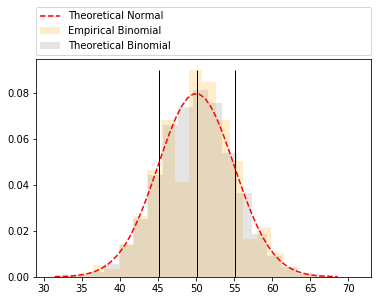

In [3]:
kwargs = dict(histtype='stepfilled', alpha=0.2, bins=20, edgecolor='None', density=True)

plt.hist(V, color='orange', label='Empirical Binomial', **kwargs)
plt.hist(binomial, color='grey', label='Theoretical Binomial', **kwargs)
plt.plot(normal, norm.pdf(normal, 50, 5), 'r--', label = 'Theoretical Normal')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

plt.vlines(x=mean_V, ymin=0, ymax=0.09, linewidth=1)
plt.vlines(x=mean_V - std_V, ymin=0, ymax=0.09, linewidth=1)
plt.vlines(x=mean_V + std_V, ymin=0, ymax=0.09, linewidth=1)

## Task 1-2

In [4]:
n_sample = 10000
y = np.zeros(n_sample)
for i in range(n_sample):
    y[i] = np.max(np.random.binomial(100, 0.5, size=n_sample))

In [5]:
x = np.linspace(50, 100, 50)
largest_pdf = n_sample * norm.pdf(x, loc=50, scale=5) * (norm.cdf(x, loc=50, scale=5) ** (n_sample-1))

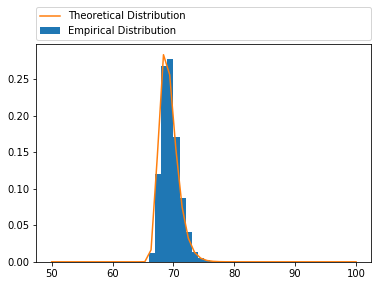

In [6]:
plt.hist(y, range=(50, 100), bins=50, density=True, label = 'Empirical Distribution')
plt.plot(x, largest_pdf, label = 'Theoretical Distribution')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

In [7]:
n_sample = 100
y = np.zeros(n_sample)
for i in range(n_sample):
    y[i] = np.max(np.random.binomial(100, 0.5, size=n_sample))
    
x = np.linspace(50, 100, 50)
largest_pdf = n_sample * norm.pdf(x, loc=50, scale=5) * (norm.cdf(x, loc=50, scale=5) ** (n_sample-1))

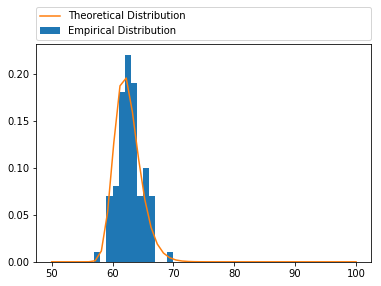

In [8]:
plt.hist(y, range=(50, 100), bins=50, density=True, label = 'Empirical Distribution')
plt.plot(x, largest_pdf, label = 'Theoretical Distribution')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

## Task 2-1 (Mutations only – Ignore the Parent)
Consider the same set 𝑆 = {0,1}^100 as before – we call it state space, now.

Write a Matlab code that starts with an initial all-zero state X𝑖𝑛𝑖 = (0,0, ... ). This is your initial individual.

In a loop, create 200 further generations. In order to create a new generation, take the current individual, and randomly flip one of its bits.

Repeat the whole experiment 1000 times and plot all the values, that is, the sum of the 100 components, versus the respective generation number in order to show how values evolve over time.

In a second plot, show the average progress made by the ensemble, that is, the difference between the new and the old mean value per generation – again versus the generation number.

Interpret: What do you expect? Compare your plot with some analytical expression if possible.

In [78]:
def evolve(generation, n_mutation):
    x = np.zeros(100)
    sum_generation = np.zeros(generation)
    imp_generation = np.zeros(generation)
    
    for i in range(generation):
        flip_indices = np.random.choice(x.shape[0], n_mutation, replace=False)
        
        imp_generation[i] = np.sum(np.where(x[flip_indices] == 0, 1, -1))
        x[flip_indices] = np.where(x[flip_indices] == 0, 1, 0)
        sum_generation[i] = np.sum(x)
    
    return sum_generation, imp_generation

In [91]:
n_experiments = 1000
sum_record = np.zeros(shape=(1000, 200))
imp_record = np.zeros(shape=(1000, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve(200, 1) 

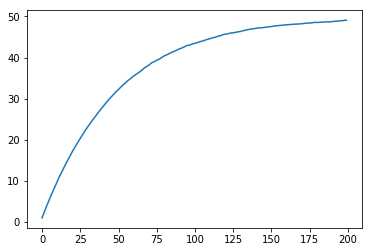

In [92]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)

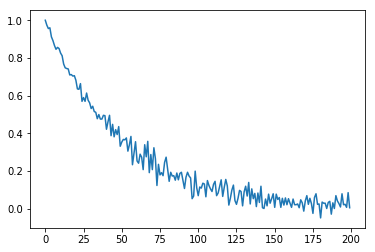

In [93]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)

## Task 2-2 (Mutations + Selection (Children plus Parent))
In the same way as above, study a slightly different scenario where a parent creates c children – each based on a single bit flip, and the new individual is best(children, parent). Create plots as in task 1 for c = 1, c = 3, and c = 5. Also plot our theory curves for the expected improvement per generation
𝐸[improvement] = 1 − (𝑘/𝑁)^𝑐 and compare.

In [104]:
def evolve(generation, n_children, n_mutation):
    x = np.zeros(100)
    sum_generation = np.zeros(generation)
    imp_generation = np.zeros(generation)
    
    for i in range(generation):
        for j in range(n_children):
            flip_indices = np.random.choice(x.shape[0], n_mutation, replace=False)
                
            imp_generation[i] = np.sum(np.where(x[flip_indices] == 0, 1, -1))
            x[flip_indices] = np.where(x[flip_indices] == 0, 1, 0)
            sum_generation[i] = np.sum(x)
                
            if imp_generation[i] == 1:
                break
    
    return sum_generation, imp_generation

In [105]:
n_experiments = 1000
sum_record = np.zeros(shape=(1000, 200))
imp_record = np.zeros(shape=(1000, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve(200, n_children=1, n_mutation=1) 

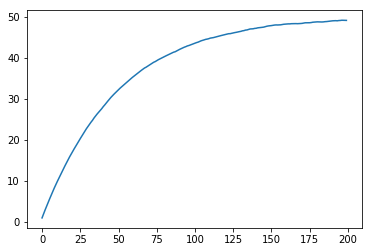

In [106]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)

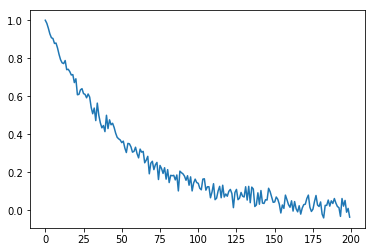

In [107]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)

In [108]:
n_experiments = 1000
sum_record = np.zeros(shape=(1000, 200))
imp_record = np.zeros(shape=(1000, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve(200, n_children=3, n_mutation=1) 

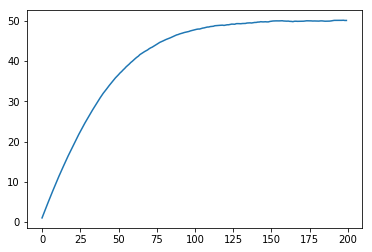

In [109]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)

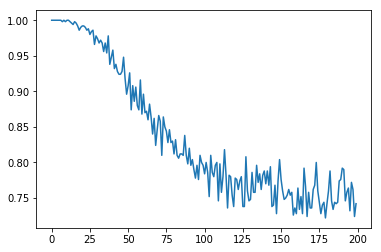

In [112]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)

In [113]:
n_experiments = 1000
sum_record = np.zeros(shape=(1000, 200))
imp_record = np.zeros(shape=(1000, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve(200, n_children=5, n_mutation=1) 

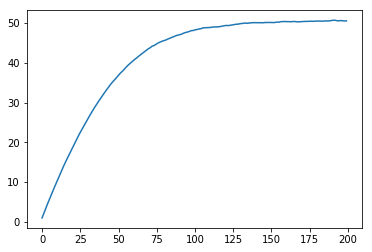

In [114]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)

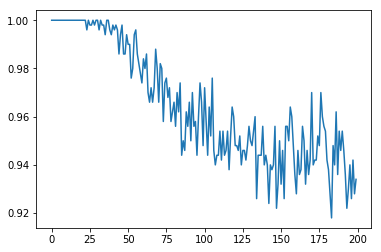

In [115]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)

In [116]:
def e(k, N, c):
    return 1 - (k / N) ** c

In [136]:
k = np.arange(200)
d = e(k, 200, 5)

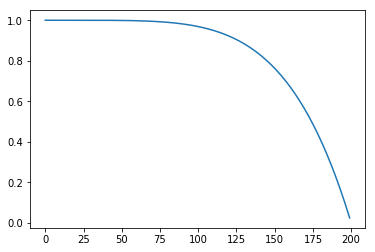

In [137]:
plt.plot(k, d)

## Task 2-3 (Larger Mutations + Selection (Children plus Parent))
Repeat task 2 but consider f bit flips rather than a single one. Summarize the consequences of such an enhanced mutation.

In [157]:
n_experiments = 5000
sum_record = np.zeros(shape=(n_experiments, 200))
imp_record = np.zeros(shape=(n_experiments, 200))

for i in range(n_experiments):
    sum_record[i], imp_record[i] = evolve(200, n_children=1, n_mutation=3) 

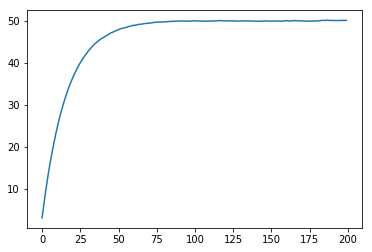

In [158]:
avg_rec = np.mean(sum_record, axis=0)
plt.plot(avg_rec)

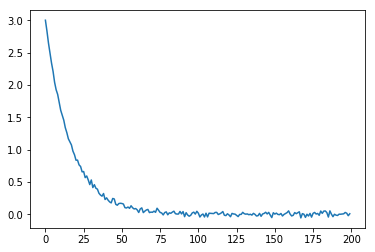

In [159]:
avg_imp = np.mean(imp_record, axis=0)
plt.plot(avg_imp)